In [82]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
xls = pd.ExcelFile("c:/Users/asus/Documents/Kuliah S1/Data Mining/Data villa dan hotel.xlsx")
data = xls.parse('Data')

In [4]:
data.head()

,jenis_hotel,cancel,selang_hari,datang_thn,datang_bln,datang_minggu,datang_hari,akhir_pekan,hari_kerja,dewasa,...,deposit,agen,perusahaan,daftar_tunggu_hari,tipe_pelanggan,tarif_rata_hari,parkir,khusus,status_reservasi,status_reservasi_tgl
0,Villa,tidak ada cancel,342,2015,7,27,1,0,0,2,...,1,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Villa,tidak ada cancel,737,2015,7,27,1,0,0,2,...,1,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Villa,tidak ada cancel,7,2015,7,27,1,0,1,1,...,1,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Villa,tidak ada cancel,13,2015,7,27,1,0,1,1,...,1,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Villa,tidak ada cancel,14,2015,7,27,1,0,2,2,...,1,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [62]:
data.dtypes

jenis_hotel                      object
cancel                           object
selang_hari                       int64
datang_thn                        int64
datang_bln                        int64
datang_minggu                     int64
datang_hari                       int64
akhir_pekan                       int64
hari_kerja                        int64
dewasa                            int64
anak                            float64
bayi                              int64
pesan_meal                       object
Kode Negara                      object
pasar                            object
pesan                            object
pesan_ulang                       int64
cancel_sebelumnya                 int64
tdk_cancel_sebelumnya             int64
pesan_kamar                      object
tandai_kamar                     object
perubahan_pesan                   int64
deposit                           int64
agen                            float64
perusahaan                      float64


In [64]:
data.isnull().sum()

jenis_hotel                   0
cancel                        0
selang_hari                   0
datang_thn                    0
datang_bln                    0
datang_minggu                 0
datang_hari                   0
akhir_pekan                   0
hari_kerja                    0
dewasa                        0
anak                          4
bayi                          0
pesan_meal                    0
Kode Negara                 488
pasar                         0
pesan                         0
pesan_ulang                   0
cancel_sebelumnya             0
tdk_cancel_sebelumnya         0
pesan_kamar                   0
tandai_kamar                  0
perubahan_pesan               0
deposit                       0
agen                      16340
perusahaan               112593
daftar_tunggu_hari            0
tipe_pelanggan                0
tarif_rata_hari               0
parkir                        0
khusus                        0
status_reservasi              0
status_r

In [60]:
deskripsi=data[['selang_hari', 'akhir_pekan', 'hari_kerja', 'dewasa', 'anak', 'bayi', 'tarif_rata_hari']]
deskripsi.describe()

,selang_hari,akhir_pekan,hari_kerja,dewasa,anak,bayi,tarif_rata_hari
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,0.927599,2.500302,1.856403,0.103890,0.007949,101.831122
std,106.863097,0.998613,1.908286,0.579261,0.398555,0.097436,50.535790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,69.290000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,94.575000
75%,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,126.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,5400.000000


In [84]:
data.anak = data.anak.fillna(data.anak.mean())
data["Kode Negara"] = data["Kode Negara"].fillna(data["Kode Negara"].mode()[0])
data.agen = data.agen.fillna(data.agen.mode()[0])
data.perusahaan = data.perusahaan.fillna(data.perusahaan.mode()[0])

In [85]:
data.isnull().sum()

jenis_hotel              0
cancel                   0
selang_hari              0
datang_thn               0
datang_bln               0
datang_minggu            0
datang_hari              0
akhir_pekan              0
hari_kerja               0
dewasa                   0
anak                     0
bayi                     0
pesan_meal               0
Kode Negara              0
pasar                    0
pesan                    0
pesan_ulang              0
cancel_sebelumnya        0
tdk_cancel_sebelumnya    0
pesan_kamar              0
tandai_kamar             0
perubahan_pesan          0
deposit                  0
agen                     0
perusahaan               0
daftar_tunggu_hari       0
tipe_pelanggan           0
tarif_rata_hari          0
parkir                   0
khusus                   0
status_reservasi         0
status_reservasi_tgl     0
dtype: int64

In [7]:
data.head()

,jenis_hotel,cancel,selang_hari,datang_thn,datang_bln,datang_minggu,datang_hari,akhir_pekan,hari_kerja,dewasa,...,deposit,agen,perusahaan,daftar_tunggu_hari,tipe_pelanggan,tarif_rata_hari,parkir,khusus,status_reservasi,status_reservasi_tgl
0,Villa,tidak ada cancel,342,2015,7,27,1,0,0,2,...,1,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Villa,tidak ada cancel,737,2015,7,27,1,0,0,2,...,1,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Villa,tidak ada cancel,7,2015,7,27,1,0,1,1,...,1,86.693382,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Villa,tidak ada cancel,13,2015,7,27,1,0,1,1,...,1,304.000000,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Villa,tidak ada cancel,14,2015,7,27,1,0,2,2,...,1,240.000000,189.266735,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Eksplorasi Data

<AxesSubplot:ylabel='jenis_hotel'>

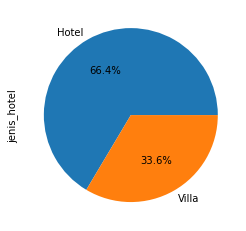

In [31]:
Jenis_hotel=data['jenis_hotel'].value_counts()
Jenis_hotel.plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='pesan_meal'>

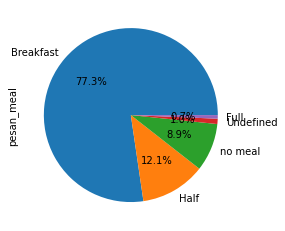

In [42]:
Makanan=data['pesan_meal'].value_counts()
Makanan.plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='pasar'>

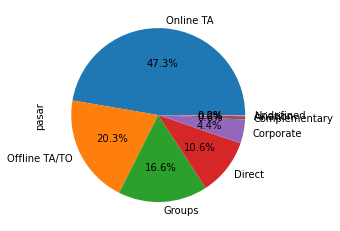

In [38]:
Pasar=data['pasar'].value_counts()
Pasar.plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='pesan'>

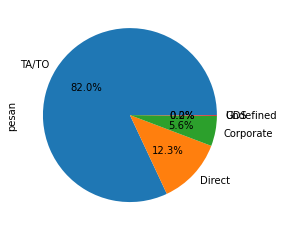

In [41]:
Pesan=data['pesan'].value_counts()
Pesan.plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='deposit'>

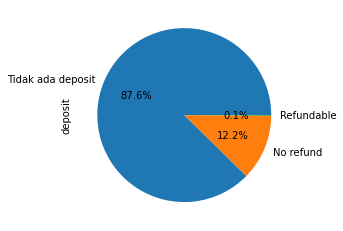

In [40]:
labels = ['Tidak ada deposit', 'No refund', 'Refundable']
Deposit=data['deposit'].value_counts()
Deposit.plot.pie(labels=labels, autopct='%1.1f%%')

<AxesSubplot:ylabel='tipe_pelanggan'>

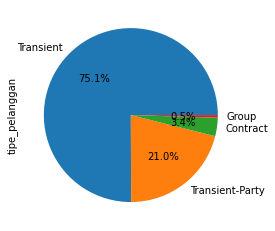

In [61]:
Pelanggan=data['tipe_pelanggan'].value_counts()
Pelanggan.plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='status_reservasi'>

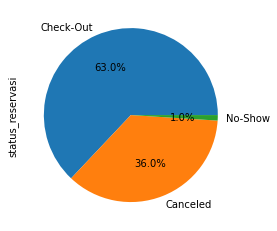

In [68]:
Reservasi=data['status_reservasi'].value_counts()
Reservasi.plot.pie(autopct='%1.1f%%')

In [42]:
LE=LabelEncoder()
data['Kode_hotel']=LE.fit_transform(data['jenis_hotel'])
data.head()

,jenis_hotel,cancel,selang_hari,datang_thn,datang_bln,datang_minggu,datang_hari,akhir_pekan,hari_kerja,dewasa,...,agen,perusahaan,daftar_tunggu_hari,tipe_pelanggan,tarif_rata_hari,parkir,khusus,status_reservasi,status_reservasi_tgl,Kode_hotel
0,1,1,342,2015,7,27,1,0,0,2,...,9.0,40.0,0,2,0.0,0,0,Check-Out,2015-07-01,1
1,1,1,737,2015,7,27,1,0,0,2,...,9.0,40.0,0,2,0.0,0,0,Check-Out,2015-07-01,1
2,1,1,7,2015,7,27,1,0,1,1,...,9.0,40.0,0,2,75.0,0,0,Check-Out,2015-07-02,1
3,1,1,13,2015,7,27,1,0,1,1,...,304.0,40.0,0,2,75.0,0,0,Check-Out,2015-07-02,1
4,1,1,14,2015,7,27,1,0,2,2,...,240.0,40.0,0,2,98.0,0,1,Check-Out,2015-07-03,1


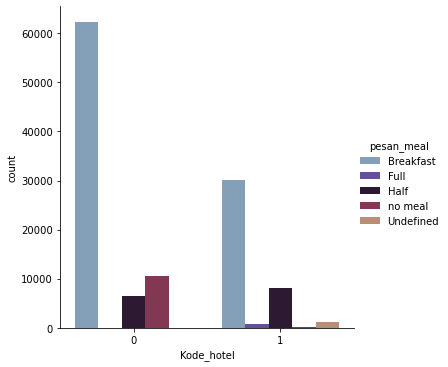

In [65]:
sns.catplot(x="Kode_hotel", kind='count',hue="pesan_meal",palette="twilight",data=data)

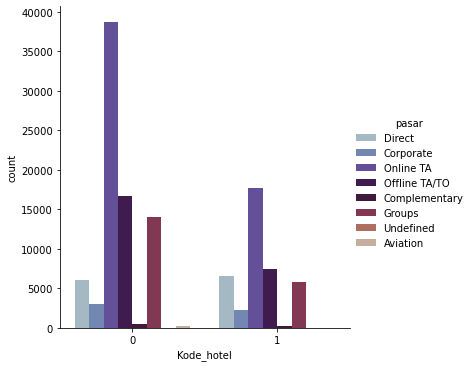

In [64]:
sns.catplot(x="Kode_hotel", kind='count',hue="pasar",palette="twilight",data=data)

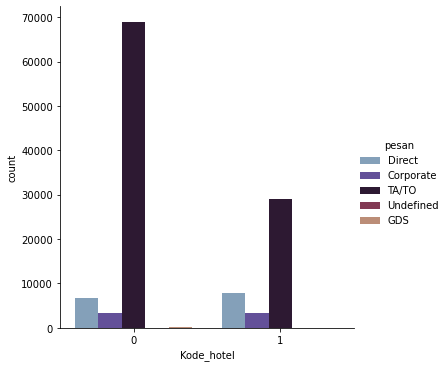

In [63]:
sns.catplot(x="Kode_hotel", kind='count',hue="pesan",palette="twilight",data=data)

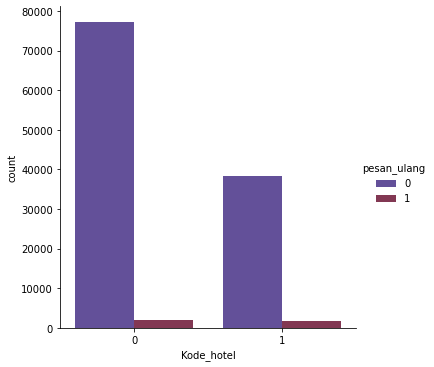

In [80]:
sns.catplot(x="Kode_hotel", kind='count',hue="pesan_ulang", palette="twilight",data=data)

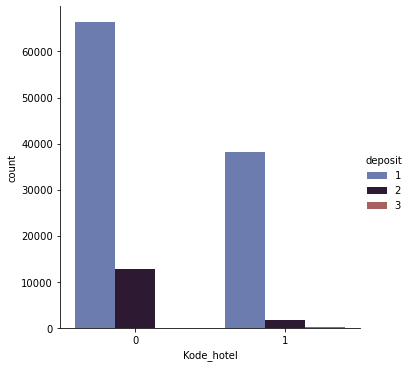

In [66]:
sns.catplot(x="Kode_hotel", kind='count',hue="deposit",palette="twilight",data=data)

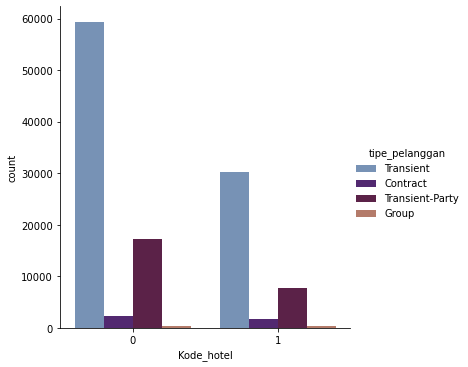

In [67]:
sns.catplot(x="Kode_hotel", kind='count',hue="tipe_pelanggan",palette="twilight",data=data)

# Feature Selection

In [86]:
#Variabel numerik aja
data_numerik = data.select_dtypes([np.number])
data_numerik.head(3)

,selang_hari,datang_thn,datang_bln,datang_minggu,datang_hari,akhir_pekan,hari_kerja,dewasa,anak,bayi,...,cancel_sebelumnya,tdk_cancel_sebelumnya,perubahan_pesan,deposit,agen,perusahaan,daftar_tunggu_hari,tarif_rata_hari,parkir,khusus
0,342,2015,7,27,1,0,0,2,0.0,0,...,0,0,3,1,9.0,40.0,0,0.0,0,0
1,737,2015,7,27,1,0,0,2,0.0,0,...,0,0,4,1,9.0,40.0,0,0.0,0,0
2,7,2015,7,27,1,0,1,1,0.0,0,...,0,0,0,1,9.0,40.0,0,75.0,0,0


In [87]:
# buang variabel
data_numerik.drop(['pesan_ulang', 'deposit', 'agen', 'perusahaan'],axis=1,inplace=True)
data_numerik.head(3)

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,selang_hari,datang_thn,datang_bln,datang_minggu,datang_hari,akhir_pekan,hari_kerja,dewasa,anak,bayi,cancel_sebelumnya,tdk_cancel_sebelumnya,perubahan_pesan,daftar_tunggu_hari,tarif_rata_hari,parkir,khusus
0,342,2015,7,27,1,0,0,2,0.0,0,0,0,3,0,0.0,0,0
1,737,2015,7,27,1,0,0,2,0.0,0,0,0,4,0,0.0,0,0
2,7,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,75.0,0,0


In [88]:
# feature selection - correlation thresholds: buang variabel yang punya korelasi tinggi dengan yang lain
def find_correlation(df, thresh=0.9):    
    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1)
    already_in = set()
    result = []
    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

find_correlation(data_numerik,thresh=0.9)

['datang_bln']

In [89]:
# buang variabel
data_numerik.drop(['datang_bln'],axis=1,inplace=True)
data_numerik.head(3)

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,selang_hari,datang_thn,datang_minggu,datang_hari,akhir_pekan,hari_kerja,dewasa,anak,bayi,cancel_sebelumnya,tdk_cancel_sebelumnya,perubahan_pesan,daftar_tunggu_hari,tarif_rata_hari,parkir,khusus
0,342,2015,27,1,0,0,2,0.0,0,0,0,3,0,0.0,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,4,0,0.0,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,75.0,0,0
